In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [6]:
PATH_DATA = "../data/raw/"

In [7]:
train = pd.read_csv(os.path.join(PATH_DATA, "train.csv"))
test = pd.read_csv(os.path.join(PATH_DATA, "test.csv"))

In [8]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


The columns cabin has too many null values - we will drop it. Also the columns ticket and passengerid are not relevant since they do not contain any information.

In [13]:
df_cleaned = train.drop(columns=['PassengerId', 'Ticket', 'Cabin'])

In [14]:
df_cleaned.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [15]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Fare      891 non-null    float64
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [16]:
y = df_cleaned.Survived

In [21]:
y[y == 1].sum()/len(y)

np.float64(0.3838383838383838)

The class is sufficiently balanced. Accuracy is a good metric to evaluate the model.

(array([40., 14., 15., 31., 79., 98., 85., 84., 73., 45., 35., 35., 29.,
        16., 13., 11.,  4.,  5.,  1.,  1.]),
 array([ 0.42 ,  4.399,  8.378, 12.357, 16.336, 20.315, 24.294, 28.273,
        32.252, 36.231, 40.21 , 44.189, 48.168, 52.147, 56.126, 60.105,
        64.084, 68.063, 72.042, 76.021, 80.   ]),
 <BarContainer object of 20 artists>)

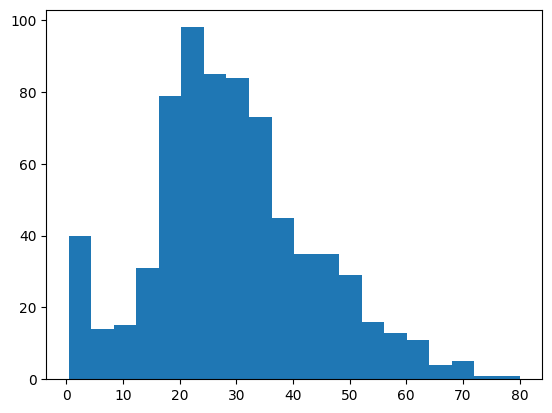

In [26]:
plt.hist(df_cleaned.Age, bins='auto')

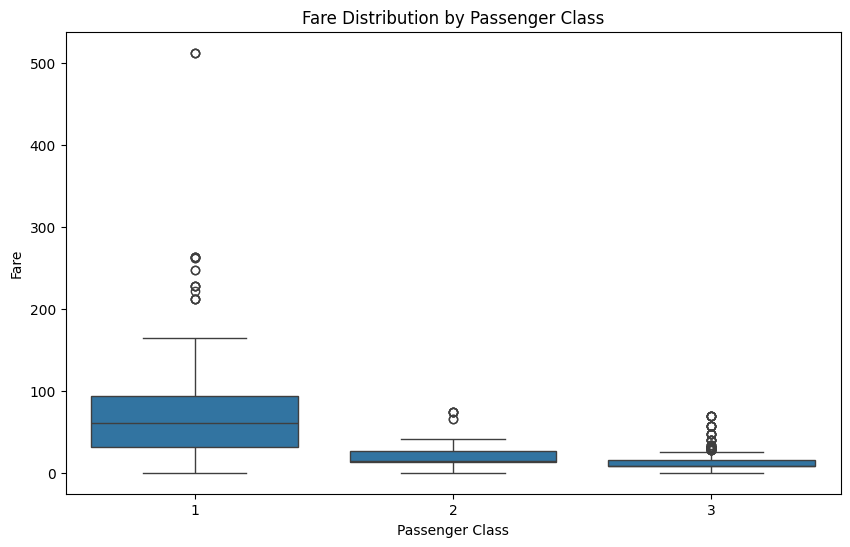

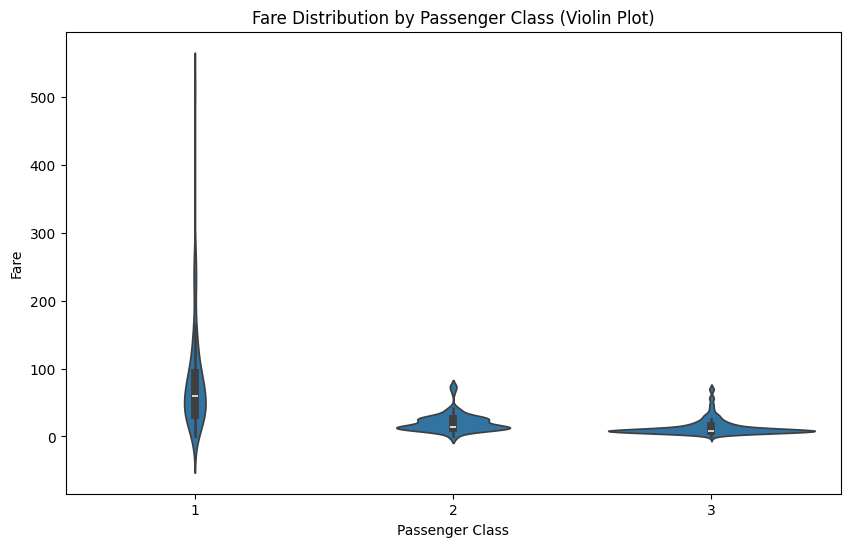

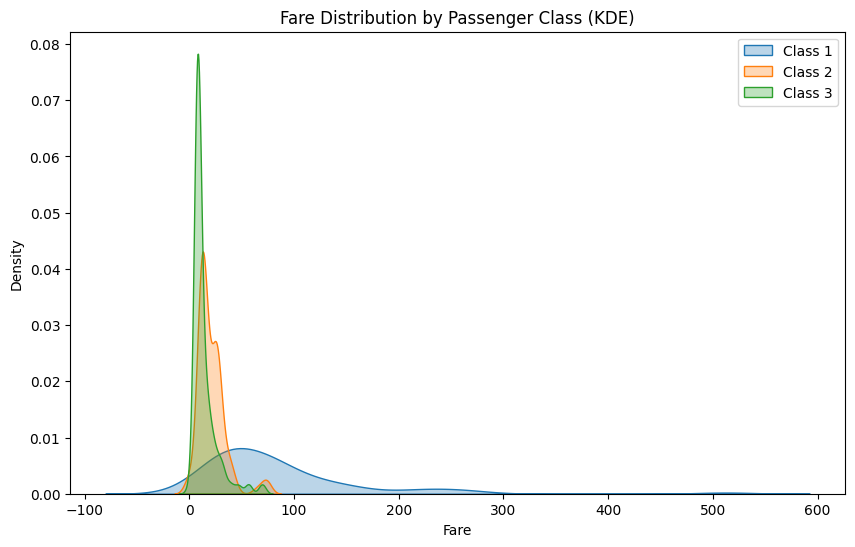

Summary Statistics by Passenger Class:
        count       mean        std  min       25%      50%   75%       max
Pclass                                                                     
1       216.0  84.154687  78.380373  0.0  30.92395  60.2875  93.5  512.3292
2       184.0  20.662183  13.417399  0.0  13.00000  14.2500  26.0   73.5000
3       491.0  13.675550  11.778142  0.0   7.75000   8.0500  15.5   69.5500

Kruskal-Wallis Test:
H-statistic: 438.0437
P-value: 7.5861e-96
The fare distributions differ significantly across classes!


In [28]:
# Load the data
train_df = pd.read_csv('../data/raw/train.csv')

# 1. Box Plot - Great for comparing distributions
plt.figure(figsize=(10, 6))
sns.boxplot(data=train_df, x='Pclass', y='Fare')
plt.title('Fare Distribution by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Fare')
plt.show()

# 2. Violin Plot - Shows distribution shape
plt.figure(figsize=(10, 6))
sns.violinplot(data=train_df, x='Pclass', y='Fare')
plt.title('Fare Distribution by Passenger Class (Violin Plot)')
plt.xlabel('Passenger Class')
plt.ylabel('Fare')
plt.show()

# 3. Overlapping KDE plots - See all distributions together
plt.figure(figsize=(10, 6))
for pclass in [1, 2, 3]:
    subset = train_df[train_df['Pclass'] == pclass]['Fare'].dropna()
    sns.kdeplot(subset, label=f'Class {pclass}', fill=True, alpha=0.3)
plt.title('Fare Distribution by Passenger Class (KDE)')
plt.xlabel('Fare')
plt.ylabel('Density')
plt.legend()
plt.show()

# 4. Summary Statistics
print("Summary Statistics by Passenger Class:")
print(train_df.groupby('Pclass')['Fare'].describe())

# 5. Statistical Test (Kruskal-Wallis - non-parametric)
from scipy import stats
class1 = train_df[train_df['Pclass'] == 1]['Fare'].dropna()
class2 = train_df[train_df['Pclass'] == 2]['Fare'].dropna()
class3 = train_df[train_df['Pclass'] == 3]['Fare'].dropna()

h_stat, p_value = stats.kruskal(class1, class2, class3)
print(f"\nKruskal-Wallis Test:")
print(f"H-statistic: {h_stat:.4f}")
print(f"P-value: {p_value:.4e}")
if p_value < 0.05:
    print("The fare distributions differ significantly across classes!")

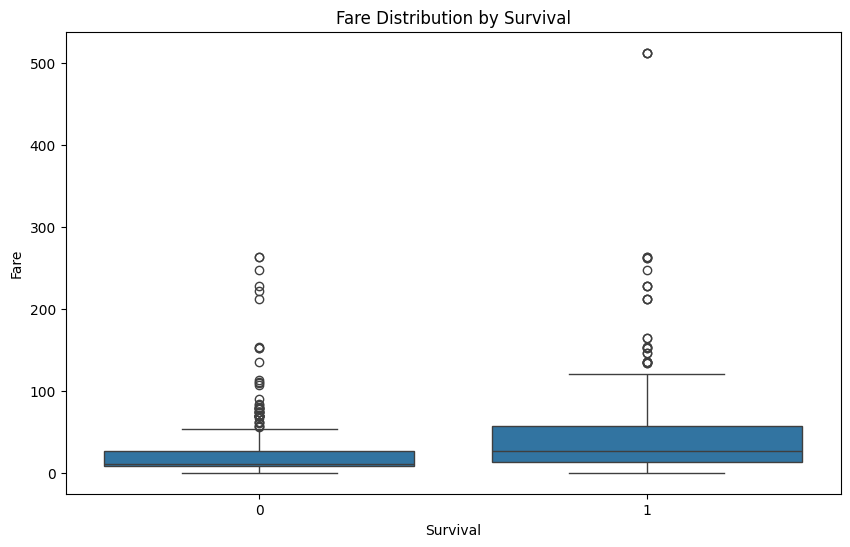

In [31]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_cleaned, x='Survived', y='Fare')
plt.title('Fare Distribution by Survival')
plt.xlabel('Survival')
plt.ylabel('Fare')
plt.show()

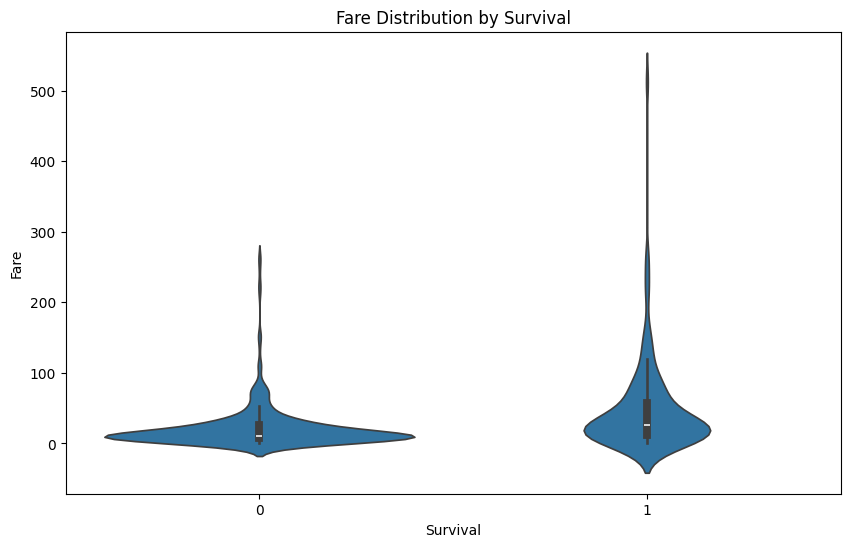

In [32]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=df_cleaned, x='Survived', y='Fare')
plt.title('Fare Distribution by Survival')
plt.xlabel('Survival')
plt.ylabel('Fare')
plt.show()

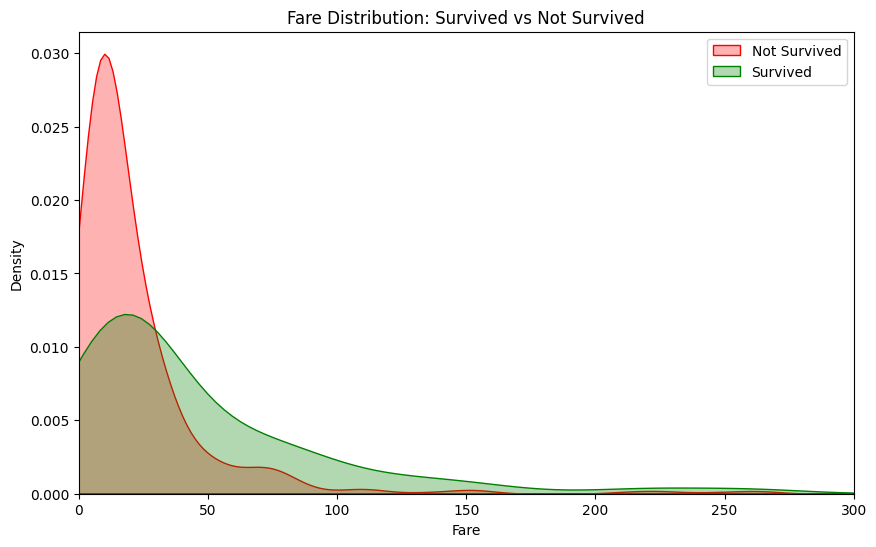

/var/folders/df/dtlb1tr53pbb3n0pn95n1r9c0000gn/T/ipykernel_21625/2449582848.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train_df, x='Survived', y='Fare', palette=['red', 'green'])


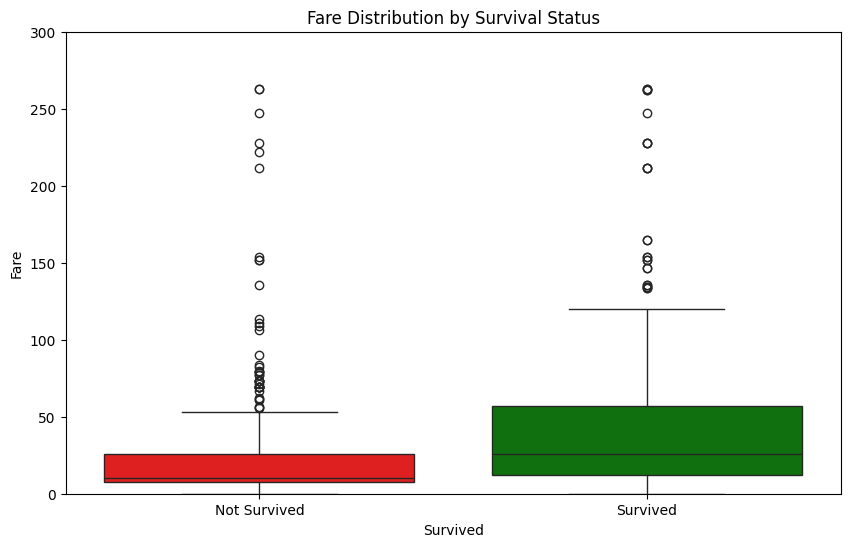

Mann-Whitney U Test:
Statistic: 129951.5
P-value: 4.5535e-22
There is a statistically significant difference in Fare distributions.


In [33]:

# 1. KDE Plot (Kernel Density Estimate) - Best for shape comparison
plt.figure(figsize=(10, 6))
sns.kdeplot(data=train_df[train_df['Survived'] == 0], x='Fare', label='Not Survived', fill=True, alpha=0.3, color='red')
sns.kdeplot(data=train_df[train_df['Survived'] == 1], x='Fare', label='Survived', fill=True, alpha=0.3, color='green')
plt.title('Fare Distribution: Survived vs Not Survived')
plt.xlabel('Fare')
plt.xlim(0, 300) # Limiting x-axis to zoom in (optional, as there are high outliers)
plt.legend()
plt.show()

# 2. Box Plot - Best for comparing medians and outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=train_df, x='Survived', y='Fare', palette=['red', 'green'])
plt.title('Fare Distribution by Survival Status')
plt.xticks([0, 1], ['Not Survived', 'Survived'])
plt.ylim(0, 300) # Limiting y-axis to see the boxes better
plt.show()

# 3. Statistical Test (Mann-Whitney U Test)
# Since Fare is not normally distributed, we use a non-parametric test
from scipy.stats import mannwhitneyu

survived_fares = train_df[train_df['Survived'] == 1]['Fare'].dropna()
not_survived_fares = train_df[train_df['Survived'] == 0]['Fare'].dropna()

stat, p_value = mannwhitneyu(survived_fares, not_survived_fares)

print(f"Mann-Whitney U Test:")
print(f"Statistic: {stat}")
print(f"P-value: {p_value:.4e}")
if p_value < 0.05:
    print("There is a statistically significant difference in Fare distributions.")